## Product Classifier

In [245]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [246]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Dataset/train'
valid_path = 'Dataset/test'

In [247]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [248]:

# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [249]:

# useful for getting number of output classes
folders = glob('Dataset/train/*')

In [250]:
folders

['Dataset/train\\audi',
 'Dataset/train\\lamborghini',
 'Dataset/train\\mercedes']

In [251]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [252]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [253]:
# view the structure of the model
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [254]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [255]:

# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [256]:

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [257]:

test_set = test_datagen.flow_from_directory('Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [258]:
len(test_set)

2

In [259]:
len(training_set)

2

In [260]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\vishant.sharma\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 27s 16s/step - loss: 6.7181 - accuracy: 0.3125 - val_loss: 4.8814 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 17s 12s/step - loss: 4.5677 - accuracy: 0.4062 - val_loss: 10.3495 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 17s 12s/step - loss: 7.0754 - accuracy: 0.4167 - val_loss: 12.5239 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 17s 13s/step - loss: 8.2221 - accuracy: 0.3958 - val_loss: 8.8656 - val_accuracy: 0.2931
Epoch 5/50
2/2 [==============================] - 18s 13s/step - loss: 5.5067 - accuracy: 0.4062 - val_loss: 3.9492 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 17s 12s/step - loss: 1.9308 - accuracy: 0.4792 - val_loss: 3.0696 - val_accuracy: 0.5172
Epoch 7/50
2/2 [==============================] - 17s 12s/step - loss: 3.2304 - accuracy: 0.4375 - val_loss: 2.7002 - val_accuracy: 0.5517
Epoch 8/50
2/2 [=========

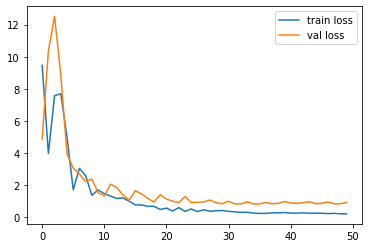

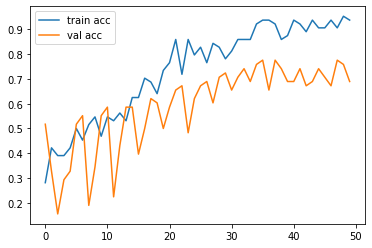

<Figure size 432x288 with 0 Axes>

In [261]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [262]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [263]:
y_pred = model.predict(test_set)

In [264]:
y_pred

array([[4.84578088e-02, 8.40197802e-01, 1.11344382e-01],
       [2.72000139e-03, 9.82119441e-01, 1.51605792e-02],
       [1.26848614e-03, 6.25953436e-01, 3.72778088e-01],
       [3.59667331e-01, 5.65285027e-01, 7.50476345e-02],
       [5.34009363e-04, 9.77062225e-01, 2.24037394e-02],
       [1.00201905e-01, 2.65179068e-01, 6.34618938e-01],
       [1.19735384e-02, 8.79961252e-01, 1.08065218e-01],
       [3.16346139e-02, 4.12296563e-01, 5.56068778e-01],
       [2.30228957e-02, 3.98805171e-01, 5.78171909e-01],
       [3.39954197e-02, 6.69952691e-01, 2.96051979e-01],
       [6.91742071e-06, 1.61586271e-04, 9.99831438e-01],
       [3.08197178e-02, 1.65290388e-04, 9.69015002e-01],
       [3.33986580e-02, 1.84934348e-01, 7.81666994e-01],
       [2.53755301e-01, 2.84904897e-01, 4.61339802e-01],
       [1.30090356e-01, 1.51657596e-01, 7.18252063e-01],
       [1.80457187e-06, 3.40401777e-04, 9.99657750e-01],
       [2.39379063e-01, 3.72155249e-01, 3.88465732e-01],
       [6.60808664e-03, 3.08873

In [265]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [266]:
y_pred

array([1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0,
       2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 0, 0,
       2, 1, 2, 2, 1, 1, 1, 1, 0, 1, 2, 0, 2, 1], dtype=int64)

In [313]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [314]:
model=load_model('model_resnet50.h5')

In [369]:
img=image.load_img('Dataset/test/audi/22.jpg',target_size=(224,224))

In [370]:
x=image.img_to_array(img)


In [371]:
x.shape

(224, 224, 3)

In [372]:
x=x/255

In [373]:
#x=np.expand_dims(x,axis=0)
#img_data=preprocess_input(x)
#img_data.shape
img_data = x

In [374]:
img_data = img_data.reshape((1, img_data.shape[0], img_data.shape[1], img_data.shape[2]))

In [378]:
img_data.shape

(1, 224, 224, 3)

In [375]:
model.predict(img_data)

array([[0.66375685, 0.10819022, 0.22805293]], dtype=float32)

In [376]:
a=np.argmax(model.predict(img_data), axis=1)

In [377]:
a==0

array([ True])